# Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots

# Datasets

In [2]:
date_cols_1 = ['DOB','DOD']
date_cols_2 = ['ClaimStartDt', 'ClaimEndDt','AdmissionDt','DischargeDt']
date_cols_3 = ['ClaimStartDt', 'ClaimEndDt']

In [3]:
ben_train = pd.read_csv("C:\\Users\\pm018586\\OneDrive - Zelis Healthcare\\Documents\\Data Science Training\\EDA Fraud Detection Dataset\\Dataset\\train\\Beneficiary_train.csv",
                        parse_dates=date_cols_1)

in_train = pd.read_csv("C:\\Users\\pm018586\\OneDrive - Zelis Healthcare\\Documents\\Data Science Training\\EDA Fraud Detection Dataset\\Dataset\\train\\Inpatient_train.csv",
                       parse_dates=date_cols_2)

out_train = pd.read_csv("C:\\Users\\pm018586\\OneDrive - Zelis Healthcare\\Documents\\Data Science Training\\EDA Fraud Detection Dataset\\Dataset\\train\\Outpatient_train.csv",
                        parse_dates=date_cols_3)

fraud_train = pd.read_csv("C:\\Users\\pm018586\\OneDrive - Zelis Healthcare\\Documents\\Data Science Training\\EDA Fraud Detection Dataset\\Dataset\\train\\Fraud_train.csv")   


Following we will try to perform basic data cleaning and validation for each of the dataset individually

## Benefeciary

In [4]:
ben_train.head()

BeneID        DOB DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 NaT       1     1                     0     39   
1  BENE11002 1936-09-01 NaT       2     1                     0     39   
2  BENE11003 1936-08-01 NaT       1     1                     0     52   
3  BENE11004 1922-07-01 NaT       1     1                     0     39   
4  BENE11005 1935-09-01 NaT       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   
2                       2                     2                          1   
3                       2                     1                          1   
4                       2                     1                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   
2                         2                                2   
3                         1                                1   
4                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   
2                   2                         0                      0   
3                   2                         0                      0   
4                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200  

[5 rows x 25 columns]

In [5]:
ben_train.info()

# DOB & DOD - Dates 
# Info about gender 
# INfo about race
# state - int 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              1421 non-null    datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

In [6]:
print(ben_train.RenalDiseaseIndicator.value_counts())
# SO turn 0s to N or 1s to Y
ben_train.RenalDiseaseIndicator = ben_train.RenalDiseaseIndicator.map({'0': 'N',
                                                                       'Y': 'Y'})
print(ben_train.RenalDiseaseIndicator.value_counts())
ben_train.RenalDiseaseIndicator = ben_train.RenalDiseaseIndicator.astype('category')

RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64
RenalDiseaseIndicator
N    118978
Y     19578
Name: count, dtype: int64


In [7]:
print(ben_train.Gender.value_counts())
ben_train.Gender = ben_train.Gender.astype(str)
ben_train.Gender = ben_train.Gender.map({'1': 'M','2': 'F'})
print(ben_train.Gender.value_counts())

ben_train.Gender = ben_train.Gender.astype('category')

Gender
2    79106
1    59450
Name: count, dtype: int64
Gender
F    79106
M    59450
Name: count, dtype: int64


In [8]:
ben_train.dtypes

BeneID                                     object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                   category
Race                                        int64
RenalDiseaseIndicator                    category
State                                       int64
County                                      int64
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                       int64
ChronicCond_Heartfailure                    int64
ChronicCond_KidneyDisease                   int64
ChronicCond_Cancer                          int64
ChronicCond_ObstrPulmonary                  int64
ChronicCond_Depression                      int64
ChronicCond_Diabetes                        int64
ChronicCond_IschemicHeart                   int64
ChronicCond_Osteoporasis                    int64
ChronicCond_rheumatoidarthritis             int64


In [9]:
ben_train.BeneID.value_counts()
# To check for duplicates if any

BeneID
BENE11001     1
BENE11002     1
BENE11003     1
BENE11004     1
BENE11005     1
             ..
BENE159194    1
BENE159195    1
BENE159196    1
BENE159197    1
BENE159198    1
Name: count, Length: 138556, dtype: int64

In [10]:
ben_train.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

Adding age column can be used later to know the age distribution 

In [11]:
ben_train['Age'] = round((ben_train['DOD'] - ben_train['DOB']).dt.days / 365)

print(ben_train.Age.isna().sum())

ben_train['Age'].fillna(
    round((pd.to_datetime('2010-01-01') - ben_train['DOB']).dt.days / 365),
    inplace=True
)

print(ben_train.Age.isna().sum())

137135
0


C:\Users\pm018586\AppData\Local\Temp\ipykernel_3584\2357040718.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ben_train['Age'].fillna(


In [12]:
ben_train.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 138556 entries, 0 to 138555
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
138556 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


## InPatient

In [13]:
in_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

In [14]:
in_train.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

No need to have Operating Physician for everyone so no need to impute values there or bother about null values in that case
Same holds with OtherPhysician column too

Deductable Amount paid column has null values dont know for what reason but can look into it.

Not necessary to have all the Procedure and Diagnosis codes used for all the inpatient data points so we can ignore null values even in that case 

In [15]:
in_train.BeneID.value_counts()

BeneID
BENE134170    8
BENE64791     7
BENE62091     7
BENE117116    7
BENE119457    7
             ..
BENE159043    1
BENE11065     1
BENE11066     1
BENE11067     1
BENE11071     1
Name: count, Length: 31289, dtype: int64

In [16]:
in_train.BeneID.nunique()

31289

We can see duplicates in the inpatient data. Which means that we can have same patient coming in admitted multiple times.

In [17]:
# Length of Stay
in_train['LOS'] = (in_train['DischargeDt'] - in_train['AdmissionDt']).dt.days + 1

# Duration of Claim
in_train['DOC'] = (in_train['ClaimEndDt'] - in_train['ClaimStartDt']).dt.days

In [18]:
multi_claim_bene_in = in_train.groupby("BeneID").agg(\
    Claim_List   = ("ClaimID", lambda x: x.astype(str).tolist()),
    Total_Cost   = ("InscClaimAmtReimbursed", "sum"),
    Avg_Cost     = ("InscClaimAmtReimbursed", "mean"),
    Claim_Len    = ("ClaimID", "count"),
    Avg_LOS      = ("LOS", "mean"),
    MAX_LOS      = ("LOS", "max")
    ).reset_index()


multi_claim_bene_in = multi_claim_bene_in[multi_claim_bene_in.Claim_Len > 1]
multi_claim_bene_in.head()

BeneID                      Claim_List  Total_Cost      Avg_Cost  \
4   BENE100010            [CLM47033, CLM64765]       12000   6000.000000   
8   BENE100032            [CLM44170, CLM80784]       25000  12500.000000   
18  BENE100075  [CLM31820, CLM33847, CLM37126]       35000  11666.666667   
26  BENE100101            [CLM59827, CLM68192]       19000   9500.000000   
28  BENE100110            [CLM41960, CLM70917]       37000  18500.000000   

    Claim_Len  Avg_LOS  MAX_LOS  
4           2     10.0       17  
8           2      3.5        4  
18          3      5.0        8  
26          2     11.0       14  
28          2      7.5        8

Text(0.5, 1.0, 'Correlation Between Key Beneficiary Metrics')

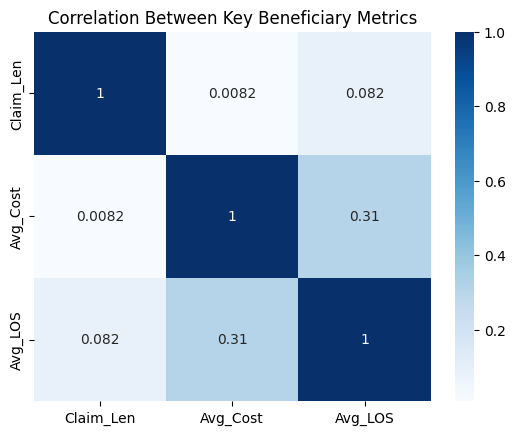

In [19]:
sns.heatmap(multi_claim_bene_in[["Claim_Len","Avg_Cost","Avg_LOS"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Key Beneficiary Metrics")

In [21]:
px.scatter(
    multi_claim_bene_in,
    x="Claim_Len",
    y="Avg_Cost",
    size="Total_Cost",
    hover_data=["BeneID","Claim_List"],
    title="Claims vs Avg Cost (Bubble Size = Total Cost)"
)

Now we have list of all the claim ids which we can use further for EDA if required when we have patients visit multiple times

In [22]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Length of Stay Distribution", "Length of Stay Boxplot"))

# --- Histogram ---
hist = px.histogram(in_train, x='LOS', nbins=50)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(in_train, x='LOS')
for trace in box.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(width = 1500, height=500)

fig.show()

In [23]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Duration of Claim Distribution", "Duration of Claim Boxplot"))

# --- Histogram ---
hist = px.histogram(in_train, x='DOC', nbins=50)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(in_train, x='DOC')
for trace in box.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(width = 1500, height=500)

fig.show()

In [24]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Ins.Claim Amt Reimbursed Distribution", "Ins.Claim Amt Reimbursed Boxplot"))

# --- Histogram ---
hist = px.histogram(in_train, x='InscClaimAmtReimbursed', nbins=100)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(in_train, x='InscClaimAmtReimbursed')
for trace in box.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(width = 1500, height=500)

fig.show()


## Outpatient

In [25]:
out_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BeneID                  517737 non-null  object        
 1   ClaimID                 517737 non-null  object        
 2   ClaimStartDt            517737 non-null  datetime64[ns]
 3   ClaimEndDt              517737 non-null  datetime64[ns]
 4   Provider                517737 non-null  object        
 5   InscClaimAmtReimbursed  517737 non-null  int64         
 6   AttendingPhysician      516341 non-null  object        
 7   OperatingPhysician      90617 non-null   object        
 8   OtherPhysician          195046 non-null  object        
 9   ClmDiagnosisCode_1      507284 non-null  object        
 10  ClmDiagnosisCode_2      322357 non-null  object        
 11  ClmDiagnosisCode_3      203257 non-null  object        
 12  ClmDiagnosisCode_4      125596

In [26]:
out_train.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

No necessary reson for all the patients to have allthe procedure codes and diagnosis codes filled even in this case so we can ignore this part

In [27]:
out_train.groupby("BeneID")["ClaimID"] \
        .agg(Diag_List=lambda x: x.astype(str).tolist()) \
        .reset_index()

BeneID                                          Diag_List
0       BENE100000                             [CLM126832, CLM351838]
1       BENE100001  [CLM229075, CLM258631, CLM332544, CLM389298, C...
2       BENE100002  [CLM173783, CLM240071, CLM262323, CLM394695, C...
3       BENE100003                                        [CLM719419]
4       BENE100004  [CLM466577, CLM511300, CLM574596, CLM657353, C...
...            ...                                                ...
133975   BENE99994  [CLM154329, CLM161752, CLM276161, CLM415731, C...
133976   BENE99995                                        [CLM146023]
133977   BENE99997  [CLM190465, CLM219793, CLM277067, CLM592710, C...
133978   BENE99998                  [CLM326995, CLM356346, CLM485283]
133979   BENE99999  [CLM187739, CLM359214, CLM475422, CLM591853, C...

[133980 rows x 2 columns]

In [28]:
print("Inpatient:", in_train.shape,
      "\nOutpatient:", out_train.shape,
      "\nBeneficiary:", ben_train.shape,
      "\nTrain (labels):", fraud_train.shape)

print("\nNumber of unique Beneficiary IDs in Inpatient data:", in_train.BeneID.nunique())
print("Number of unique Beneficiary IDs in Outpatient data:", out_train.BeneID.nunique())
print("Number of unique Beneficiary IDs in Beneficiary data:", ben_train.BeneID.nunique())

Inpatient: (40474, 32) 
Outpatient: (517737, 27) 
Beneficiary: (138556, 26) 
Train (labels): (5410, 2)

Number of unique Beneficiary IDs in Inpatient data: 31289
Number of unique Beneficiary IDs in Outpatient data: 133980
Number of unique Beneficiary IDs in Beneficiary data: 138556


In [33]:
# Duration of Claim
out_train['DOC'] = (out_train['ClaimEndDt'] - out_train['ClaimStartDt']).dt.days
out_train['LOS'] = 1


In [36]:
out_train.loc[:, ['DOC','LOS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DOC     517737 non-null  int64
 1   LOS     517737 non-null  int64
dtypes: int64(2)
memory usage: 7.9 MB


In [37]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Duration of Claim Distribution", "Duration of Claim Boxplot"))

# --- Histogram ---
hist = px.histogram(out_train, x='InscClaimAmtReimbursed', nbins=100)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(out_train, x='InscClaimAmtReimbursed')
for trace in box.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(width = 1500, height=500)

In [38]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Duration of Claim Distribution", "Duration of Claim Boxplot"))

# --- Histogram ---
hist = px.histogram(out_train, x='DOC', nbins=50)
for trace in hist.data:
    fig.add_trace(trace, row=1, col=1)

# --- Boxplot ---
box = px.box(out_train, x='DOC')
for trace in box.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(width = 1500, height=500)

# fig.show()

Here we can see that both inpatient and outpatient have duplicates present which indicates multiple visits of the patients to the hospitals.

Now we can further investigate if the inpatients went on to revisit the hospital. So what we can do is we can sort  the inpatient based on the admission date and further we can join with outpatient data and check for visits of the outpatient with same beneficiary id 

## Common Data points

In [39]:
common_benes = set(in_train["BeneID"]).intersection(out_train["BeneID"])
print("Number of common Beneficiary IDs in Inpatient and Outpatient data:", len(common_benes))
print("Common Beneficiary IDs in Inpatient and Outpatient data:", )
pprint(common_benes)

Number of common Beneficiary IDs in Inpatient and Outpatient data: 26713
Common Beneficiary IDs in Inpatient and Outpatient data:
{'BENE100002',
 'BENE100004',
 'BENE100006',
 'BENE100007',
 'BENE100010',
 'BENE100014',
 'BENE100020',
 'BENE100024',
 'BENE100032',
 'BENE100039',
 'BENE100042',
 'BENE100051',
 'BENE100052',
 'BENE100057',
 'BENE100068',
 'BENE100073',
 'BENE100074',
 'BENE100075',
 'BENE100076',
 'BENE100077',
 'BENE100088',
 'BENE100090',
 'BENE100093',
 'BENE100097',
 'BENE100100',
 'BENE100101',
 'BENE100109',
 'BENE100110',
 'BENE100116',
 'BENE100119',
 'BENE100120',
 'BENE100122',
 'BENE100126',
 'BENE100130',
 'BENE100160',
 'BENE100166',
 'BENE100167',
 'BENE100176',
 'BENE100177',
 'BENE100188',
 'BENE100189',
 'BENE100190',
 'BENE100195',
 'BENE100200',
 'BENE100206',
 'BENE100207',
 'BENE100210',
 'BENE100216',
 'BENE100220',
 'BENE100223',
 'BENE100229',
 'BENE100233',
 'BENE100235',
 'BENE100237',
 'BENE100239',
 'BENE100254',
 'BENE100261',
 'BENE100272',


So from this we can conclude that we can have multple patients coming in and getting admitted or coming after being an inpatient can revisit for regular checks

In [40]:
inpatient  = in_train.assign(VisitType="Inpatient")
outpatient = out_train.assign(VisitType="Outpatient")

In [41]:
inpatient_comm  = inpatient[inpatient["BeneID"].isin(common_benes)]
outpatient_comm = outpatient[outpatient["BeneID"].isin(common_benes)]

In [42]:
inpatient_comm.head()

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
3  BENE11011  CLM38412   2009-02-14 2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13 2009-08-30  PRV56614   
5  BENE11017  CLM70950   2009-10-06 2009-10-12  PRV54986   
6  BENE11018  CLM32075   2009-01-02 2009-01-07  PRV54090   
8  BENE11031  CLM62784   2009-08-06 2009-08-09  PRV55839   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   
5                    8000          PHY402711          PHY402711   
6                    8000          PHY412314          PHY347494   
8                    7000          PHY385030                NaN   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_10  ClmProcedureCode_1  \
3      PHY349768  2009-02-14  ...                 NaN               331.0   
4            NaN  2009-08-13  ...                 NaN              3893.0   
5      PHY402711  2009-10-06  ...                 NaN               863.0   
6            NaN  2009-01-02  ...                 NaN              4576.0   
8            NaN  2009-08-06  ...                 NaN                 NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   
5                NaN                NaN                NaN                NaN   
6                NaN                NaN                NaN                NaN   
8                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6 LOS DOC  VisitType  
3                NaN   9   8  Inpatient  
4                NaN  18  17  Inpatient  
5                NaN   7   6  Inpatient  
6                NaN   6   5  Inpatient  
8                NaN   4   3  Inpatient  

[5 rows x 33 columns]

In [43]:
outpatient_comm.head()

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
32  BENE11011  CLM144521   2009-01-18 2009-01-18  PRV52314   
33  BENE11011  CLM347780   2009-05-08 2009-05-08  PRV51012   
34  BENE11011  CLM507201   2009-08-04 2009-08-04  PRV51063   
55  BENE11014  CLM523157   2009-08-13 2009-08-13  PRV56835   
72  BENE11017  CLM110718   2008-12-19 2009-01-03  PRV54786   

    InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
32                      50          PHY379398                NaN   
33                      50          PHY429635                NaN   
34                      80          PHY345842                NaN   
55                      60          PHY373512                NaN   
72                     100          PHY371562                NaN   

   OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_2  \
32            NaN              78969  ...                NaN   
33      PHY322331              37500  ...                NaN   
34            NaN              29633  ...                NaN   
55      PHY373512              V8302  ...                NaN   
72            NaN               V861  ...                NaN   

   ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
32                NaN                NaN                NaN   
33                NaN                NaN                NaN   
34                NaN                NaN                NaN   
55                NaN                NaN                NaN   
72                NaN                NaN                NaN   

   ClmProcedureCode_6 DeductibleAmtPaid ClmAdmitDiagnosisCode DOC LOS  \
32                NaN                 0                 78900   0   1   
33                NaN                 0                 37611   0   1   
34                NaN                 0                   311   0   1   
55                NaN                 0                   NaN   0   1   
72                NaN                 0                   NaN  15   1   

     VisitType  
32  Outpatient  
33  Outpatient  
34  Outpatient  
55  Outpatient  
72  Outpatient  

[5 rows x 30 columns]

In [44]:
inpatient_comm.info()
outpatient_comm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35043 entries, 3 to 40473
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  35043 non-null  object        
 1   ClaimID                 35043 non-null  object        
 2   ClaimStartDt            35043 non-null  datetime64[ns]
 3   ClaimEndDt              35043 non-null  datetime64[ns]
 4   Provider                35043 non-null  object        
 5   InscClaimAmtReimbursed  35043 non-null  int64         
 6   AttendingPhysician      34947 non-null  object        
 7   OperatingPhysician      20659 non-null  object        
 8   OtherPhysician          4064 non-null   object        
 9   AdmissionDt             35043 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   35043 non-null  object        
 11  DeductibleAmtPaid       34236 non-null  float64       
 12  DischargeDt             35043 non-null  datetime64[

In [45]:
combined_comm = pd.concat([inpatient_comm, outpatient_comm], ignore_index=True)
combined_comm.info()
combined_comm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160882 entries, 0 to 160881
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BeneID                  160882 non-null  object        
 1   ClaimID                 160882 non-null  object        
 2   ClaimStartDt            160882 non-null  datetime64[ns]
 3   ClaimEndDt              160882 non-null  datetime64[ns]
 4   Provider                160882 non-null  object        
 5   InscClaimAmtReimbursed  160882 non-null  int64         
 6   AttendingPhysician      160372 non-null  object        
 7   OperatingPhysician      43545 non-null   object        
 8   OtherPhysician          48178 non-null   object        
 9   AdmissionDt             35043 non-null   datetime64[ns]
 10  ClmAdmitDiagnosisCode   62679 non-null   object        
 11  DeductibleAmtPaid       160075 non-null  float64       
 12  DischargeDt             35043 

BeneID   ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11011  CLM38412   2009-02-14 2009-02-22  PRV52405   
1  BENE11014  CLM63689   2009-08-13 2009-08-30  PRV56614   
2  BENE11017  CLM70950   2009-10-06 2009-10-12  PRV54986   
3  BENE11018  CLM32075   2009-01-02 2009-01-07  PRV54090   
4  BENE11031  CLM62784   2009-08-06 2009-08-09  PRV55839   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    5000          PHY369659          PHY392961   
1                   10000          PHY379376          PHY398258   
2                    8000          PHY402711          PHY402711   
3                    8000          PHY412314          PHY347494   
4                    7000          PHY385030                NaN   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_10  ClmProcedureCode_1  \
0      PHY349768  2009-02-14  ...                 NaN               331.0   
1            NaN  2009-08-13  ...                 NaN              3893.0   
2      PHY402711  2009-10-06  ...                 NaN               863.0   
3            NaN  2009-01-02  ...                 NaN              4576.0   
4            NaN  2009-08-06  ...                 NaN                 NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6 LOS DOC  VisitType  
0                NaN   9   8  Inpatient  
1                NaN  18  17  Inpatient  
2                NaN   7   6  Inpatient  
3                NaN   6   5  Inpatient  
4                NaN   4   3  Inpatient  

[5 rows x 33 columns]

In [52]:
# Define visit start and end
combined_comm["VisitStart"] = np.where(
    combined_comm["VisitType"] == "Inpatient",
    combined_comm["AdmissionDt"],
    combined_comm["ClaimStartDt"]
)

combined_comm["VisitEnd"] = np.where(
    combined_comm["VisitType"] == "Inpatient",
    combined_comm["DischargeDt"],
    combined_comm["ClaimEndDt"]
)

In [57]:
combined_comm["VisitStart"] = pd.to_datetime(combined_comm["VisitStart"])
combined_comm["VisitEnd"]   = pd.to_datetime(combined_comm["VisitEnd"])

combined_comm["LOS_days"] = (combined_comm["VisitEnd"] - combined_comm["VisitStart"]).dt.days

In [58]:
combined_comm = combined_comm.sort_values(["BeneID", "VisitStart"]).copy()
combined_comm["VisitSeq"] = combined_comm.groupby("BeneID").cumcount() + 1
combined_comm["VisitLabel"] = (
    combined_comm["VisitType"].str[:3] +  # 'Inp' / 'Out'
    "_#" + combined_comm["VisitSeq"].astype(str)
)


In [59]:

def plot_patient_timeline(visits_df, bene_id):
    # filter for that beneficiary
    df = visits_df[visits_df["BeneID"] == bene_id].copy()
    if df.empty:
        print(f"No visits found for BeneID {bene_id}")
        return
    
    df = df.sort_values("VisitStart")

    fig = px.timeline(
        df,
        x_start="VisitStart",
        x_end="VisitEnd",
        y="VisitLabel",        # one row per visit
        color="VisitType",     # Inpatient vs Outpatient color
        hover_data={
            "BeneID": True,
            "VisitType": True,
            "ClaimID": True,
            "Provider": True,
            "VisitStart": True,
            "VisitEnd": True,
            "LOS_days": True,
            "InscClaimAmtReimbursed": True,
            # For inpatient only; will just be NaN for OP rows:
            "DiagnosisGroupCode": True,
            "ClmAdmitDiagnosisCode": True,
        }
    )

    # Gantt-style: first visit at top
    fig.update_yaxes(autorange="reversed")

    fig.update_layout(
        title=f"Utilization timeline for BeneID {bene_id}",
        xaxis_title="Date",
        yaxis_title="Visit (ordered)",
        bargap=0.3,
        hoverlabel_align="left",
    )

    fig.show()


In [60]:
combined_comm[combined_comm.LOS_days == combined_comm.LOS_days.max()].groupby("BeneID").first()

ClaimID ClaimStartDt ClaimEndDt  Provider  \
BeneID                                                   
BENE102273  CLM45468   2009-04-04 2009-05-09  PRV53675   
BENE102790  CLM42641   2009-03-15 2009-04-19  PRV56763   
BENE103166  CLM69011   2009-09-21 2009-10-26  PRV51337   
BENE104245  CLM61830   2009-07-30 2009-09-03  PRV52630   
BENE107211  CLM76648   2009-11-20 2009-12-25  PRV57630   
...              ...          ...        ...       ...   
BENE96608   CLM71258   2009-10-08 2009-11-12  PRV52502   
BENE96880   CLM35340   2009-01-24 2009-02-28  PRV54337   
BENE97909   CLM52290   2009-05-22 2009-06-26  PRV57702   
BENE98257   CLM71640   2009-10-11 2009-11-15  PRV51249   
BENE99333   CLM47500   2009-04-18 2009-05-23  PRV53129   

            InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
BeneID                                                                     
BENE102273                   36000          PHY364844          PHY364844   
BENE102790                    9000          PHY417067          PHY353628   
BENE103166                   10000          PHY389153               None   
BENE104245                   11000          PHY322937          PHY383873   
BENE107211                    8000          PHY408977               None   
...                            ...                ...                ...   
BENE96608                     3000          PHY423538               None   
BENE96880                    48000          PHY410083          PHY319534   
BENE97909                     7000          PHY373246          PHY322031   
BENE98257                    41000          PHY416946          PHY425936   
BENE99333                    57000          PHY425801          PHY322165   

           OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  ...  \
BeneID                                                       ...   
BENE102273           None  2009-04-04                 78097  ...   
BENE102790           None  2009-03-15                  5070  ...   
BENE103166           None  2009-09-21                 29620  ...   
BENE104245           None  2009-07-30                 51881  ...   
BENE107211           None  2009-11-20                 29680  ...   
...                   ...         ...                   ...  ...   
BENE96608            None  2009-10-08                   311  ...   
BENE96880       PHY339769  2009-01-24                  5990  ...   
BENE97909            None  2009-05-22                 78701  ...   
BENE98257       PHY372651  2009-10-11                 78900  ...   
BENE99333       PHY369821  2009-04-18                 44101  ...   

            ClmProcedureCode_5 ClmProcedureCode_6 LOS DOC  VisitType  \
BeneID                                                                 
BENE102273                 NaN                NaN  36  35  Inpatient   
BENE102790                 NaN                NaN  36  35  Inpatient   
BENE103166                 NaN                NaN  36  35  Inpatient   
BENE104245                 NaN                NaN  36  35  Inpatient   
BENE107211                 NaN                NaN  36  35  Inpatient   
...                        ...                ...  ..  ..        ...   
BENE96608                  NaN                NaN  36  35  Inpatient   
BENE96880                  NaN                NaN  36  35  Inpatient   
BENE97909                  NaN                NaN  36  35  Inpatient   
BENE98257                  NaN                NaN  36  35  Inpatient   
BENE99333                  NaN                NaN  36  35  Inpatient   

           VisitStart   VisitEnd LOS_days VisitSeq VisitLabel  
BeneID                                                         
BENE102273 2009-04-04 2009-05-09       35        2     Inp_#2  
BENE102790 2009-03-15 2009-04-19       35        2     Inp_#2  
BENE103166 2009-09-21 2009-10-26       35        3     Inp_#3  
BENE104245 2009-07-30 2009-09-03       35        7     Inp_#7  
BENE107211 2009-11-20 2009-12-25       35        5     Inp_#5  

In [63]:
plot_patient_timeline(combined_comm, bene_id="BENE102790")


# Complete Dataset EDA